In [8]:
# the code here is inspired from the Qiskit Textbook

from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [6]:
# this is creating a circuit with 8 qubits and 8 outputs
# qubits are always initialized to give the output zero
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [3]:
# qubit j measure is written into bit j as an output
for j in range(n):
    qc_output.measure(j,j)

In [4]:
# the following is the magical code that draws the quantum circuit and shows what it looks like
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

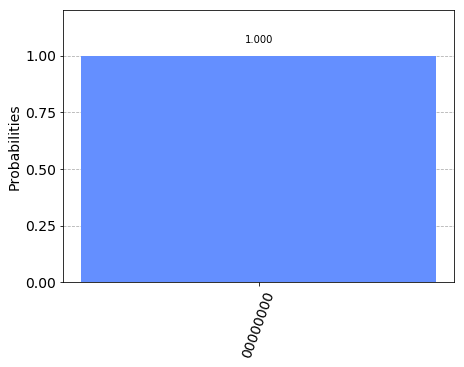

In [9]:
# to get the output, we usually run the circuit many times because there might be some randomness in quantum computers' results.
# we will use a simulator to do that, then plot the results in a histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

In [11]:
# Now let's start encoding our inputs
# we will use the simplest quantum gate to do that, the X-gate (the NOT gate) that turns 0 into 1 and 1 into 0
# in the following, we will encode the eighth qubit and apply the X operator on it

qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [13]:
# To extrcat he result of this circuit, we can add it to the previous one that does hte measurement

qc = qc_encode + qc_output
qc.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘
c: 8/═════

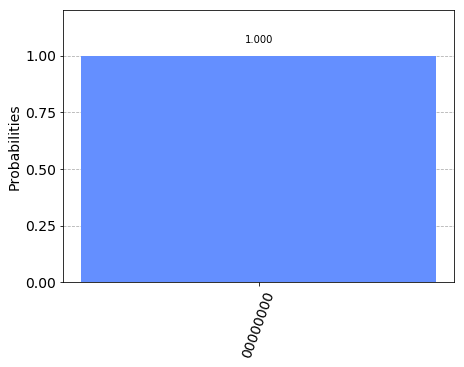

In [16]:
# now let's run the combined circuit

qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

# as we can see, the string 100000 is returned, the 1 at the leftmost is the output of the eighth qubit
# in Qiskit,we number the bits from right to left